In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


telco = pd.read_csv("telco.csv")

telco.head(5)


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_and_internet,partner_dependents,average_monthly_charges,validate,contract_type.1,phone_service.1,internet_service.1,rounded_tenure,service_type,tenure_binned
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,3,65.6,TRUE,1 Year,One Line,DSL,9.0,Internet+Phone,<1 years
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,0,59.9,TRUE,Month-to-Month,Two or More Lines,DSL,9.0,Internet+Phone,<1 years
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,0,73.9,TRUE,Month-to-Month,One Line,Fiber Optic,4.0,Internet+Phone,<1 years
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,1,98,TRUE,Month-to-Month,One Line,Fiber Optic,13.0,Internet+Phone,1-2 years
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,1,83.9,TRUE,Month-to-Month,One Line,Fiber Optic,3.0,Internet+Phone,<1 years


In [4]:
telco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              7049 non-null   object 
 1   gender                   7049 non-null   object 
 2   is_senior_citizen        7049 non-null   int64  
 3   partner                  7049 non-null   object 
 4   dependents               7049 non-null   object 
 5   phone_service            7049 non-null   int64  
 6   internet_service         7049 non-null   int64  
 7   contract_type            7049 non-null   int64  
 8   payment_type             7049 non-null   object 
 9   monthly_charges          7049 non-null   float64
 10  total_charges            7038 non-null   float64
 11  churn                    7049 non-null   object 
 12  tenure                   7049 non-null   float64
 13  is_female                7049 non-null   bool   
 14  has_churned             

In [ ]:
# Step 1: Define your goal. What's the impact? Who benefits? Why does this matter?
# identify drivers that lead to churn; recommend possible changes; will save the company money

<AxesSubplot:>

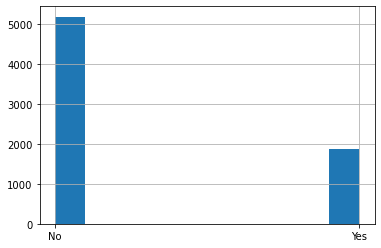

In [15]:
# Step 2: Get to know your data at a high level
telco.churn.hist()

In [17]:
telco.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

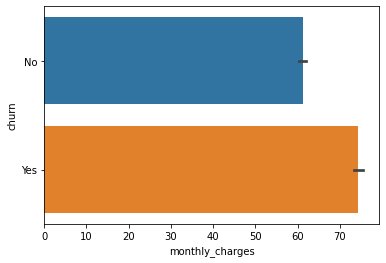

In [25]:
sns.barplot(data = telco, x = 'monthly_charges', y = 'churn')

<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

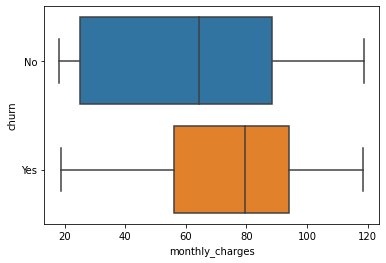

In [26]:
# customers that churn have higher monthly charges based on the median 
sns.boxplot(data = telco, x = 'monthly_charges', y = 'churn')

<AxesSubplot:xlabel='tenure', ylabel='churn'>

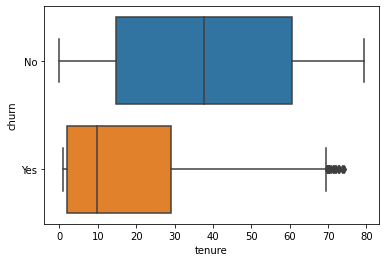

In [36]:
sns.boxplot(data = telco, x = 'tenure', y = 'churn')
# what happens after 2 years, that customers churn before year three? - contract lengths? cost increases?

In [61]:
telco[telco.tenure < 2]


0       False
1       False
2       False
3       False
4       False
        ...  
7044    False
7045    False
7046     True
7047    False
7048    False
Name: tenure, Length: 7049, dtype: bool

In [ ]:
# Step 3: Answer your initial hypotheses with visuals and statistics